Data Links:
https://assets.ctfassets.net/c7lxnbtvvcxm/6VcouEtgMpXSFh6oNaypwG/253ec6947e67c292119679ebcf7fb13b/DS_-_ess_combined_2012_2014.csv

https://assets.ctfassets.net/c7lxnbtvvcxm/AAvpYpcZhu9Yz4VI7pEAq/d1ed32a4e7fee9fe3a405b45af7fadec/DS_-_rfft.csv

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
euro = pd.read_csv("https://assets.ctfassets.net/c7lxnbtvvcxm/6VcouEtgMpXSFh6oNaypwG/253ec6947e67c292119679ebcf7fb13b/DS_-_ess_combined_2012_2014.csv")

euro.info()
euro.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8147 entries, 0 to 8146
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cntry    8147 non-null   object
 1   idno     8147 non-null   int64 
 2   year     8147 non-null   int64 
 3   tvtot    8147 non-null   int64 
 4   ppltrst  8147 non-null   int64 
 5   pplfair  8147 non-null   int64 
 6   pplhlp   8147 non-null   int64 
 7   happy    8147 non-null   int64 
 8   sclmeet  8147 non-null   int64 
 9   sclact   8147 non-null   int64 
 10  gndr     8147 non-null   int64 
 11  agea     8147 non-null   int64 
 12  partner  8147 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 827.6+ KB


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1


Did people become less trusting from 2012 to 2014?
Did people become happier from 2012 to 2014?
Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [6]:
euro.groupby(['year']).agg(['count'])

,cntry,idno,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
,count,count,count,count,count,count,count,count,count,count,count,count
year,,,,,,,,,,,,
6,4071,4071,4071,4071,4071,4071,4071,4071,4071,4071,4071,4071
7,4076,4076,4076,4076,4076,4076,4076,4076,4076,4076,4076,4076


In [9]:
euro_2012 = euro[euro['year']==6]
euro_2014 = euro[euro['year']==7]

(array([109.,  88., 224., 326., 369., 826., 516., 759., 625., 234.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

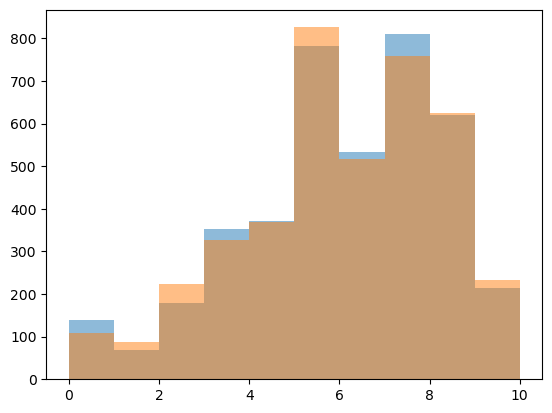

In [10]:
plt.hist(euro_2012['ppltrst'], alpha = .5)
plt.hist(euro_2014['ppltrst'], alpha = .5)

In [12]:
stats.shapiro(euro_2012['ppltrst'])
stats.shapiro(euro_2014['ppltrst'])

ShapiroResult(statistic=0.9580637216567993, pvalue=9.272778453234164e-33)

In [13]:
print(stats.describe(euro_2012['ppltrst']))
print(stats.describe(euro_2014['ppltrst']))

DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813)
DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.92717165270896, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)


In [14]:
stats.ttest_ind(euro_2012['ppltrst'], euro_2014['ppltrst'])

TtestResult(statistic=0.1443685081969842, pvalue=0.8852130548889106, df=8145.0)

p value > .05 so it is not significant

(array([   8.,   10.,   23.,   55.,   85.,  292.,  312.,  724., 1230.,
        1337.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

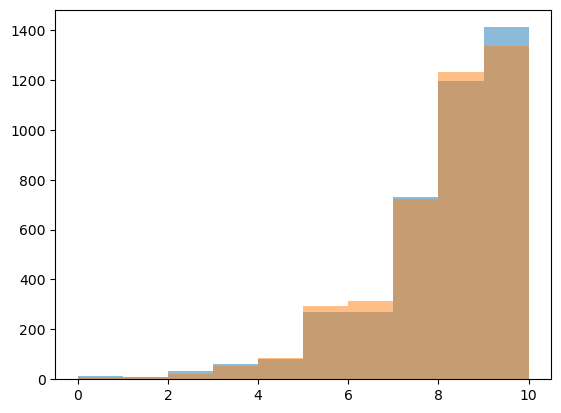

In [15]:
plt.hist(euro_2012['happy'], alpha = .5)
plt.hist(euro_2014['happy'], alpha = .5)

In [16]:
print(stats.describe(euro_2012['happy']))
print(stats.describe(euro_2014['happy']))

DescribeResult(nobs=4071, minmax=(0, 10), mean=7.731515598133137, variance=3.081952468982682, skewness=-1.1505518232802756, kurtosis=1.9055890346061979)
DescribeResult(nobs=4076, minmax=(0, 10), mean=7.6854759568204125, variance=2.840436853164115, skewness=-1.0296465664009635, kurtosis=1.5218046596567287)


In [17]:
stats.kruskal(euro_2012['happy'], euro_2014['happy'])

KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

Fail to reject because p value is greater than .05

In [18]:
euro_2014['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [19]:
cArray = ['CH', 'CZ', 'DE']

EuroList_2014 = euro_2014[euro_2014['cntry'].isin(cArray)]


array([[<Axes: title={'center': 'CH'}>, <Axes: title={'center': 'CZ'}>],
       [<Axes: title={'center': 'DE'}>, <Axes: >]], dtype=object)

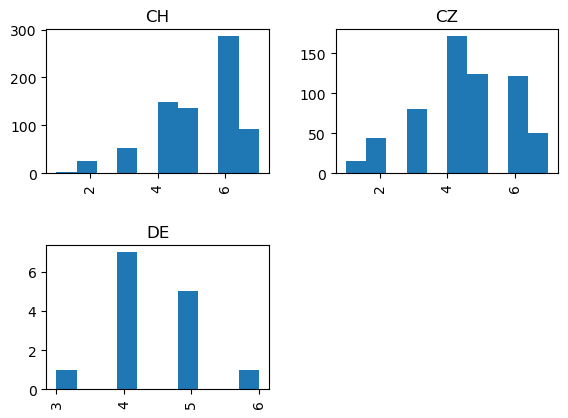

In [20]:
EuroList_2014['sclmeet'].hist(by = EuroList_2014['cntry'])

In [21]:
stats.kruskal(
    EuroList_2014.loc[EuroList_2014['cntry'] == 'CH',['sclmeet']],
    EuroList_2014.loc[EuroList_2014['cntry'] == 'CZ',['sclmeet']],
    EuroList_2014.loc[EuroList_2014['cntry'] == 'DE',['sclmeet']])

KruskalResult(statistic=array([78.92727863]), pvalue=array([7.26372193e-18]))

<Axes: title={'center': 'sclmeet'}, xlabel='cntry'>

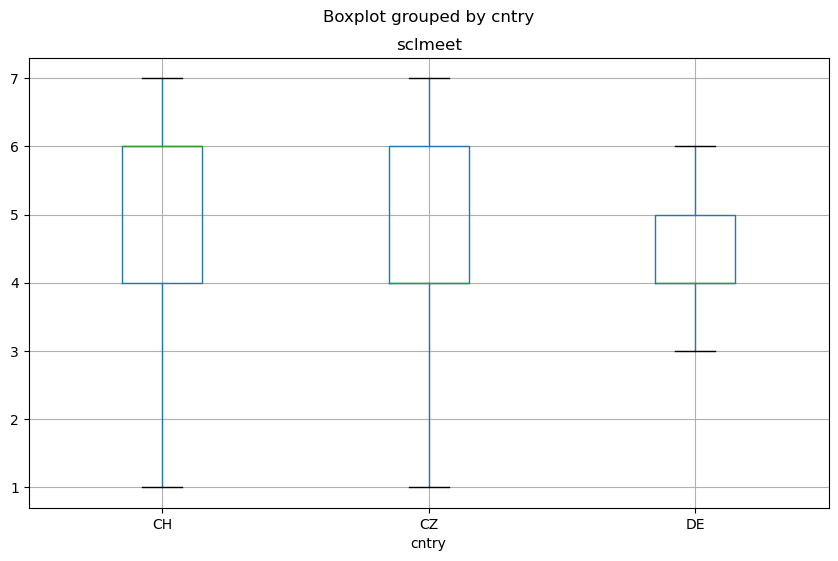

In [22]:
EuroList_2014.boxplot('sclmeet', by='cntry', figsize=(10, 6))

DE has a smaller median the the other two countries

array([[<Axes: title={'center': 'CH'}>, <Axes: title={'center': 'CZ'}>],
       [<Axes: title={'center': 'DE'}>, <Axes: >]], dtype=object)

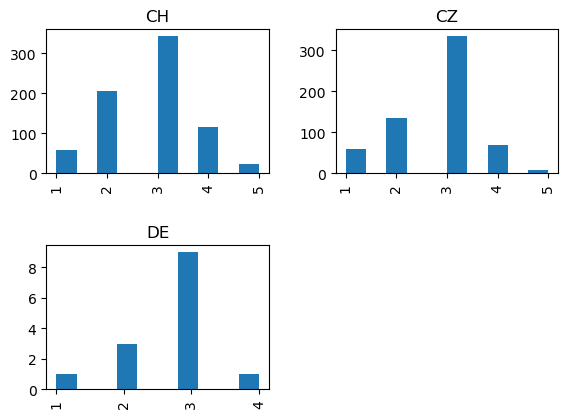

In [23]:
EuroList_2014['sclact'].hist(by = EuroList_2014['cntry'])

In [25]:
stats.f_oneway(
    EuroList_2014.loc[EuroList_2014['cntry'] == 'CH',['sclact']],
    EuroList_2014.loc[EuroList_2014['cntry'] == 'CZ',['sclact']],
    EuroList_2014.loc[EuroList_2014['cntry'] == 'DE',['sclact']])

F_onewayResult(statistic=array([0.68053231]), pvalue=array([0.50651973]))

In [26]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = EuroList_2014['sclact'],      # Data
                          groups = EuroList_2014['cntry'],   # Groups
                          alpha=0.05) 


tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
CH,CZ,-0.0553,0.4831,-0.168,0.0575,False
CH,DE,-0.0704,0.9525,-0.626,0.4853,False
CZ,DE,-0.0151,0.9978,-0.5719,0.5417,False


Fail to reject the null hypothesis, no significant difference as pvalue >= .05

In [27]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [28]:
ruff = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/rfft.csv")
ruff.head()

,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
3,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),26.0,3.0,Not applicable
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362


In [29]:
ruff_unique = ruff.pivot(index='Casenr', columns='Measurement', values='Unique')
ruff_unique.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,32.0,35.0,50.5
2,26.0,47.0,71.0
3,91.0,83.5,77.0
4,59.0,54.0,64.0
5,60.0,68.0,21.0


DescribeResult(nobs=2515, minmax=(-75.5, 68.5), mean=4.015506958250497, variance=342.23683183318553, skewness=-0.15837265462838976, kurtosis=0.7823714353134701)


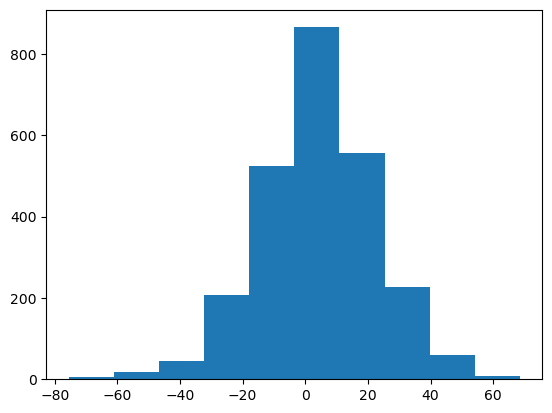

In [30]:
plt.hist(ruff_unique['Measurement 3 (2008-2012)'] - ruff_unique['Measurement 2 (2006-2008)'])
print(stats.describe(ruff_unique['Measurement 3 (2008-2012)'] - ruff_unique['Measurement 2 (2006-2008)']))

In [31]:
stats.ttest_rel(ruff_unique['Measurement 3 (2008-2012)'], ruff_unique['Measurement 2 (2006-2008)'])

TtestResult(statistic=10.88544039426271, pvalue=5.3585747477799544e-27, df=2514)

Yes there is a significance difference

In [32]:
ruff_persev = ruff.pivot(index='Casenr', columns='Measurement', values='Perseverative')
ruff_persev.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,1.0,0.0,14.5
2,3.0,3.0,0.5
3,11.0,21.0,17.0
4,49.0,39.0,11.0
5,14.0,16.0,0.0


(array([1.821e+03, 4.560e+02, 1.210e+02, 5.200e+01, 2.800e+01, 1.600e+01,
        1.300e+01, 3.000e+00, 4.000e+00, 1.000e+00]),
 array([  0.  ,  13.35,  26.7 ,  40.05,  53.4 ,  66.75,  80.1 ,  93.45,
        106.8 , 120.15, 133.5 ]),
 <BarContainer object of 10 artists>)

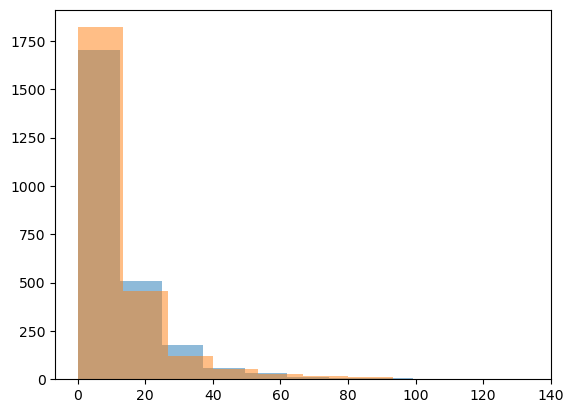

In [35]:
plt.hist(ruff_persev['Measurement 3 (2008-2012)'], alpha = .5)
plt.hist(ruff_persev['Measurement 2 (2006-2008)'], alpha = .5)

In [34]:
stats.wilcoxon(ruff_persev['Measurement 3 (2008-2012)'], ruff_persev['Measurement 2 (2006-2008)'])

WilcoxonResult(statistic=1358373.0, pvalue=0.0006927535563546565)

the null hypothesis can be rejected because p value < .05